In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train=pd.read_csv("train_data.csv")
test=pd.read_csv("test_data.csv")
sub=pd.read_csv("sample_sub.csv")

train=train.drop(columns=["case_id"])
test=test.drop(columns=["case_id"])

train["dataset"]="train"
test["dataset"]="test"

df=pd.concat([train,test])


In [3]:
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train


## Exploratory Data Analysis

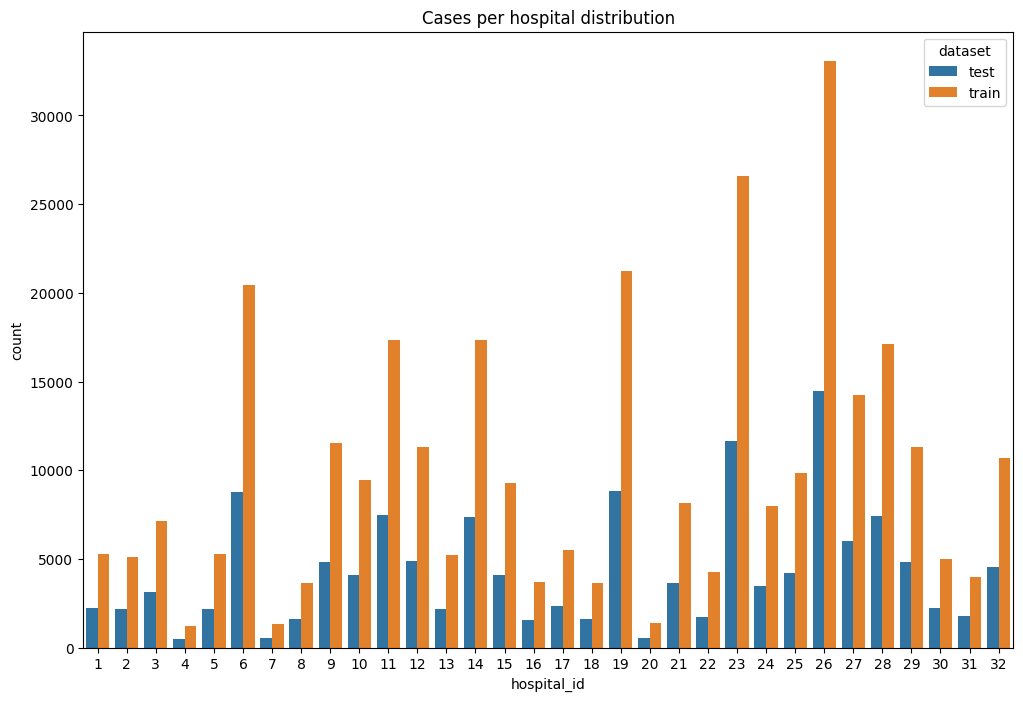

In [4]:
hostpitalID_df=df.groupby(["Hospital_code","dataset"])["patientid"].count().reset_index()
hostpitalID_df.columns=["hospital_id","dataset","count"]
plt.figure(figsize=(12, 8))
sns.barplot(data=hostpitalID_df,x="hospital_id",y="count",hue="dataset")
plt.title("Cases per hospital distribution")
plt.show()



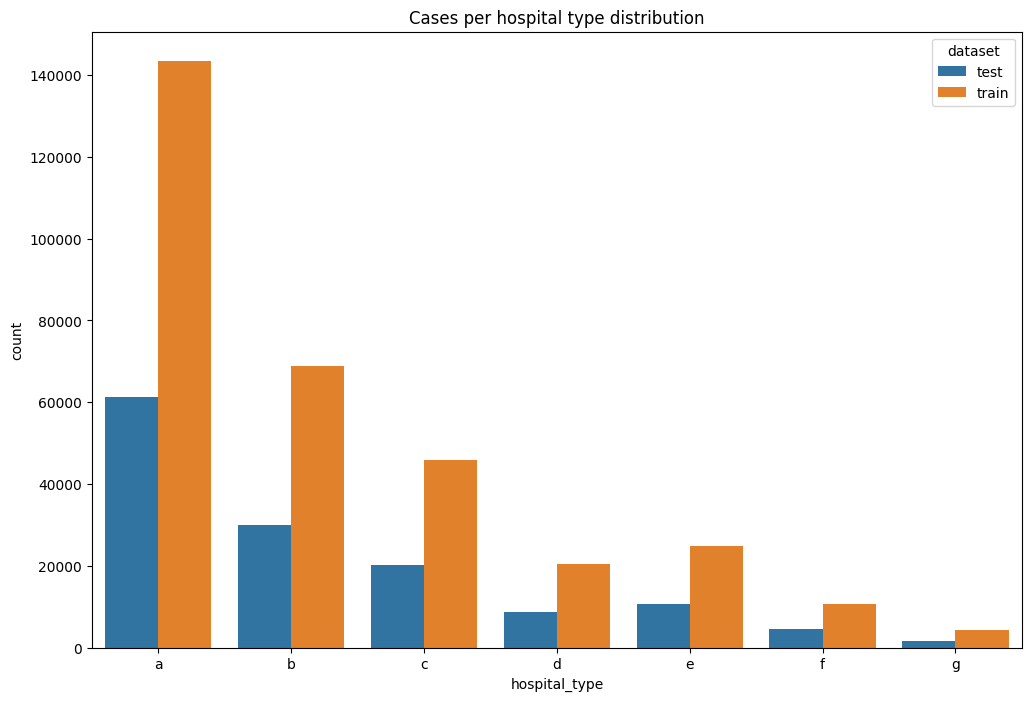

In [5]:
hostpitalType_df=df.groupby(["Hospital_type_code","dataset"])["patientid"].count().reset_index()
hostpitalType_df.columns=["hospital_type","dataset","count"]
plt.figure(figsize=(12, 8))
sns.barplot(data=hostpitalType_df,x="hospital_type",y="count",hue="dataset")
plt.title("Cases per hospital type distribution")
plt.show()

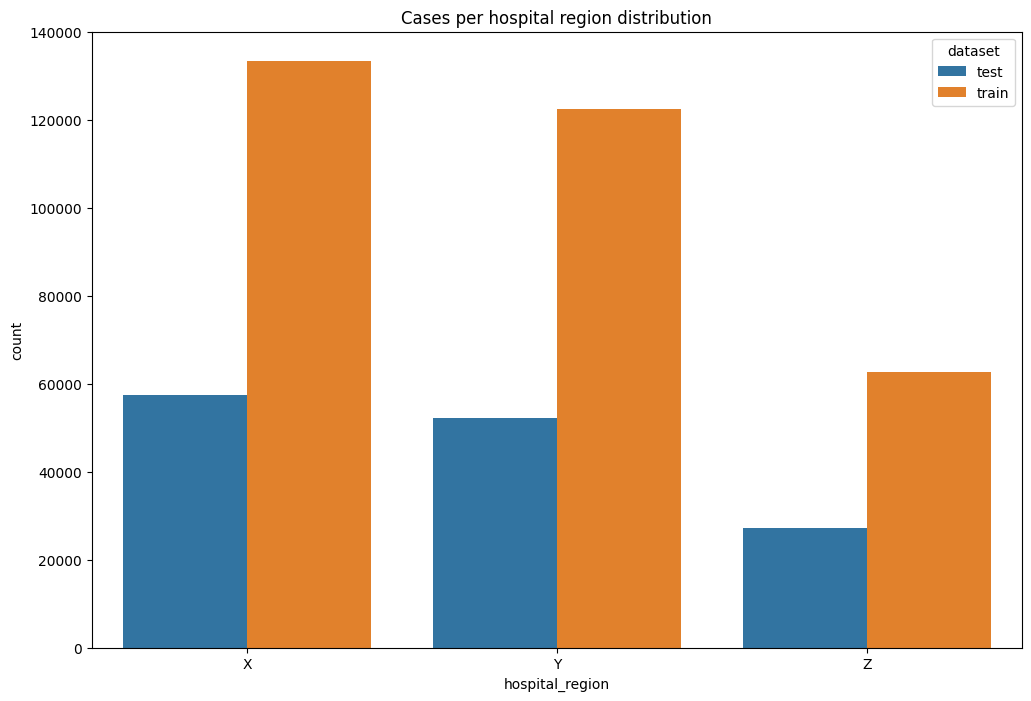

In [6]:
hostpitalRegion_df=df.groupby(["Hospital_region_code","dataset"])["patientid"].count().reset_index()
hostpitalRegion_df.columns=["hospital_region","dataset","count"]
plt.figure(figsize=(12, 8))
sns.barplot(data=hostpitalRegion_df,x="hospital_region",y="count",hue="dataset")
plt.title("Cases per hospital region distribution")
plt.show()

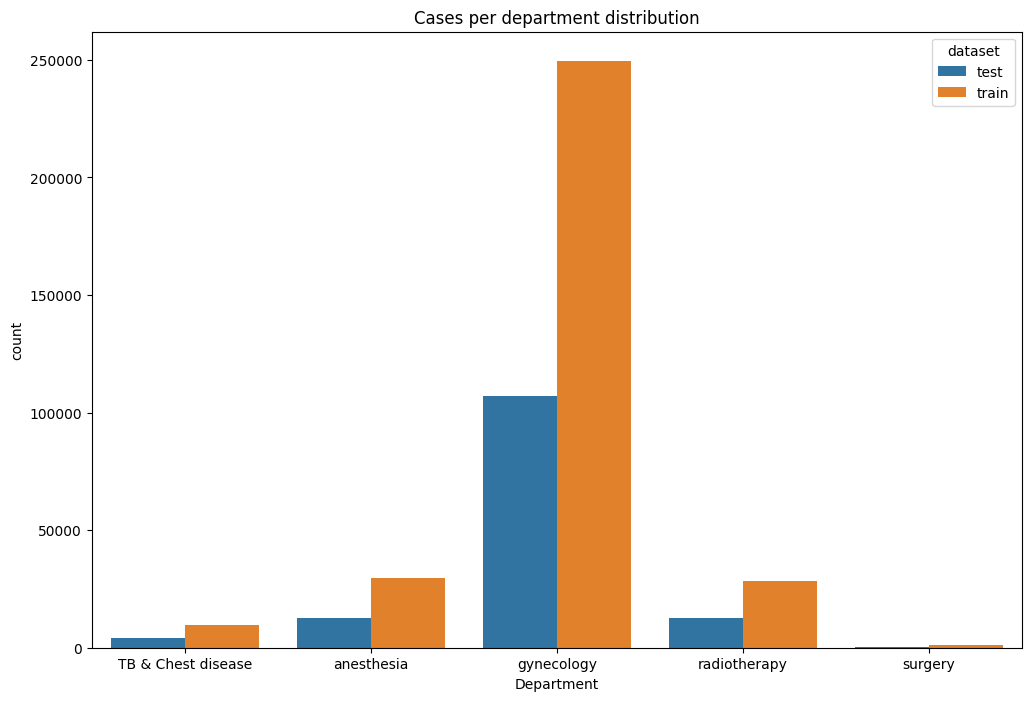

In [7]:
department_df=df.groupby(["Department","dataset"])["patientid"].count().reset_index()
department_df.columns=["Department","dataset","count"]
plt.figure(figsize=(12, 8))
sns.barplot(data=department_df,x="Department",y="count",hue="dataset")
plt.title("Cases per department distribution")
plt.show()

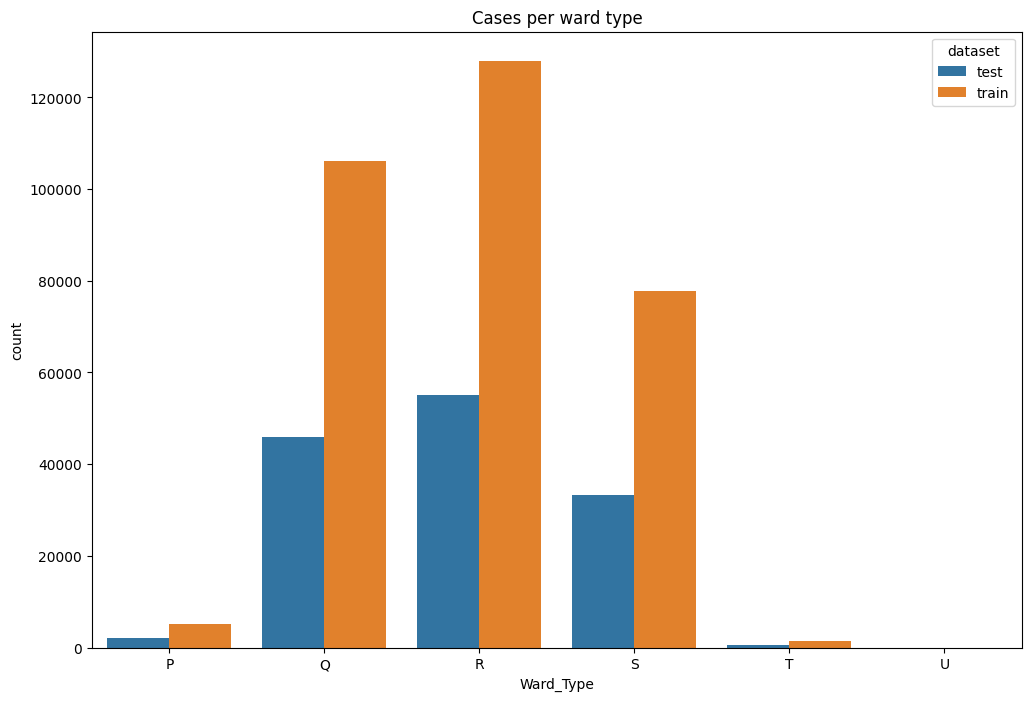

In [8]:
ward_type_df = df.groupby(["Ward_Type", "dataset"])["patientid"].count().reset_index()
ward_type_df.columns = ["Ward_Type", "dataset", "count"]
plt.figure(figsize=(12, 8))
sns.barplot(data=ward_type_df, x="Ward_Type", y="count", hue="dataset")
plt.title("Cases per ward type")
plt.show()


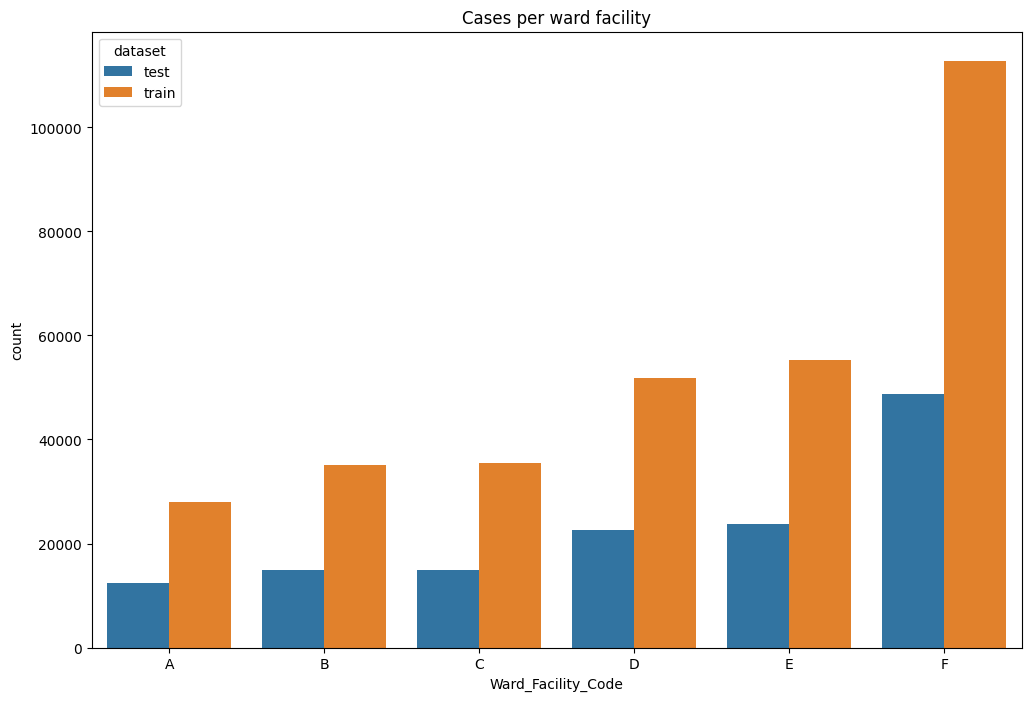

In [9]:
Ward_Facility_df = df.groupby(["Ward_Facility_Code", "dataset"])["patientid"].count().reset_index()
Ward_Facility_df.columns = ["Ward_Facility_Code", "dataset", "count"]
plt.figure(figsize=(12, 8))
sns.barplot(data=Ward_Facility_df, x="Ward_Facility_Code", y="count", hue="dataset")
plt.title("Cases per ward facility")
plt.show()


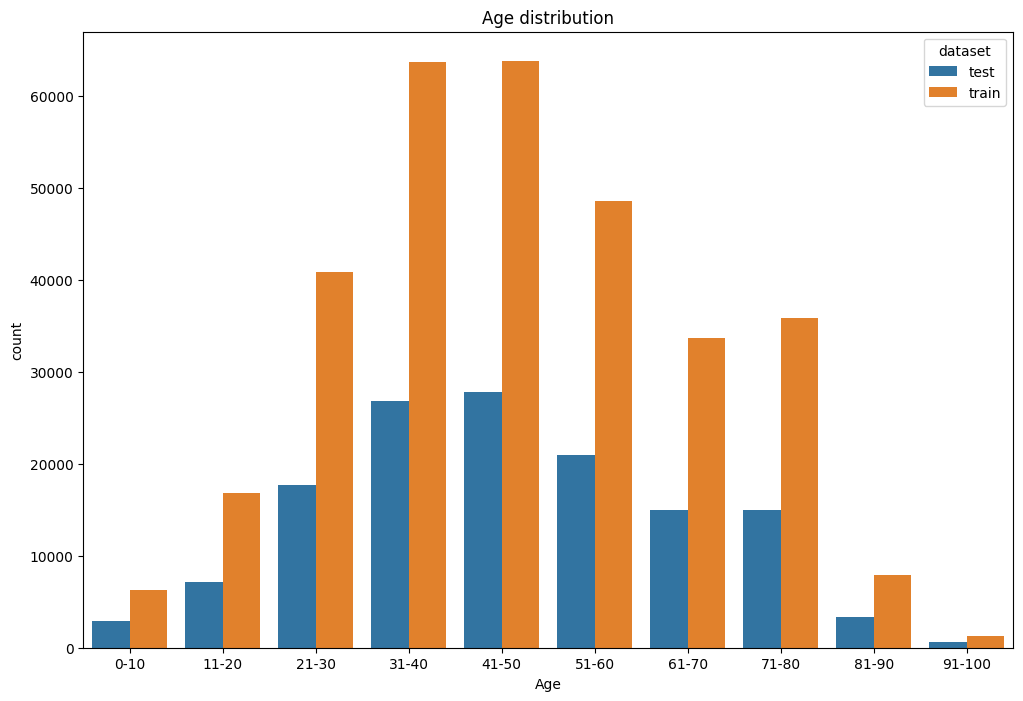

In [10]:
Age_df = df.groupby(["Age", "dataset"])["patientid"].count().reset_index()
Age_df.columns = ["Age", "dataset", "count"]
plt.figure(figsize=(12, 8))
sns.barplot(data=Age_df, x="Age", y="count", hue="dataset")
plt.title("Age distribution")
plt.show()


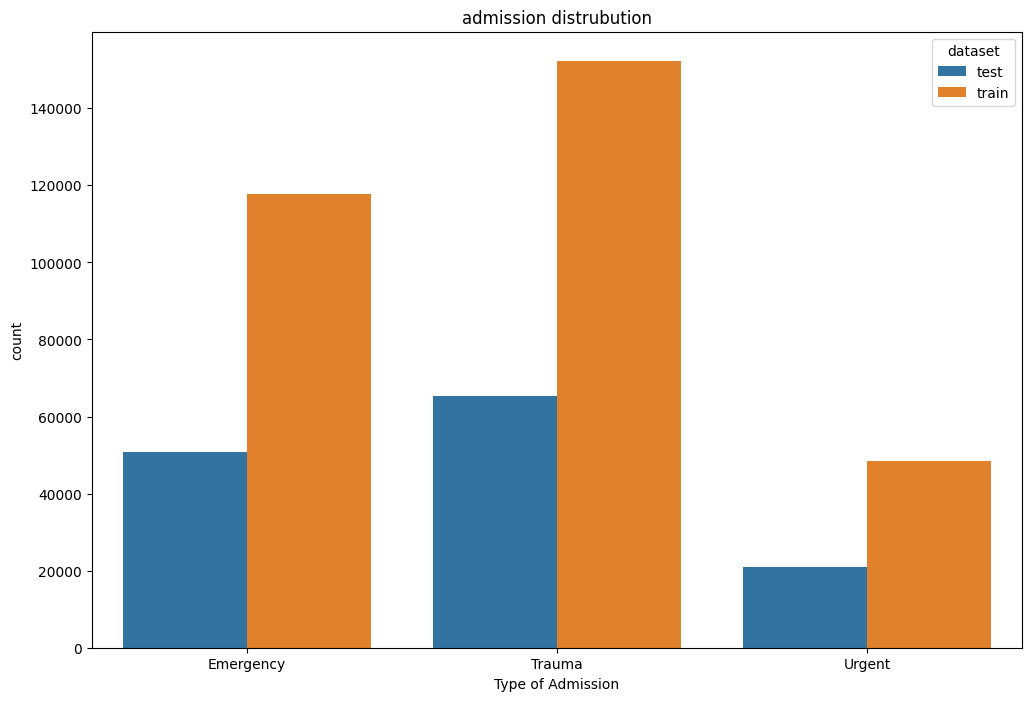

In [11]:
admission_df = df.groupby(["Type of Admission", "dataset"])["patientid"].count().reset_index()
admission_df.columns = ["Type of Admission", "dataset", "count"]
plt.figure(figsize=(12, 8))
sns.barplot(data=admission_df, x="Type of Admission", y="count", hue="dataset")
plt.title("admission distrubution")
plt.show()


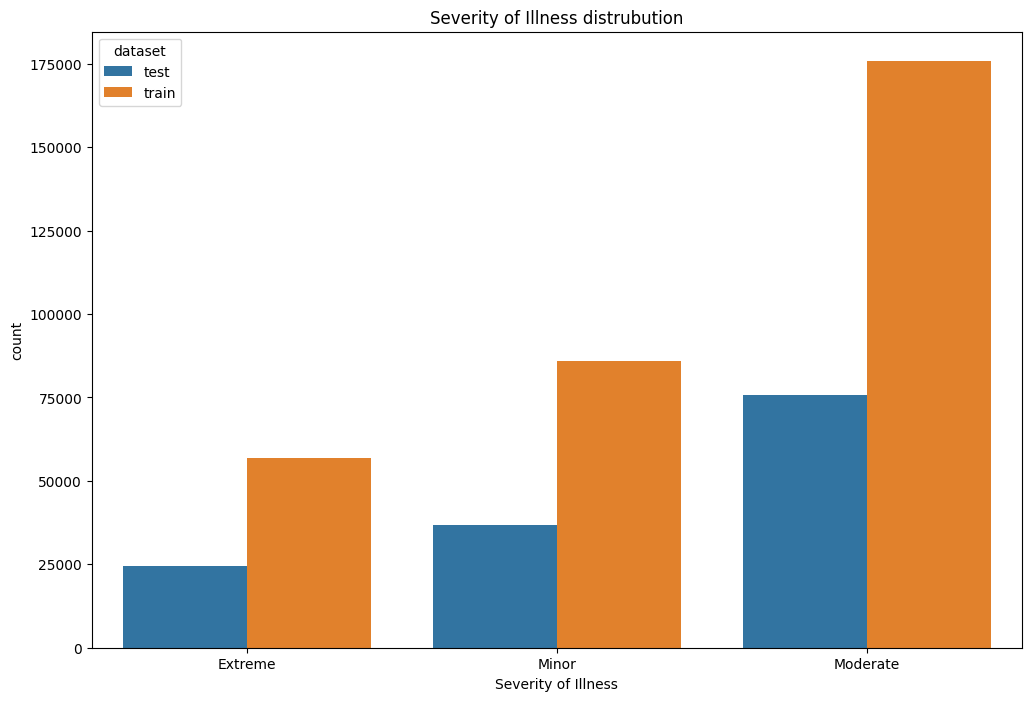

In [12]:
illness_df = df.groupby(["Severity of Illness", "dataset"])["patientid"].count().reset_index()
illness_df.columns = ["Severity of Illness", "dataset", "count"]
plt.figure(figsize=(12, 8))
sns.barplot(data=illness_df, x="Severity of Illness", y="count", hue="dataset")
plt.title("Severity of Illness distrubution")
plt.show()


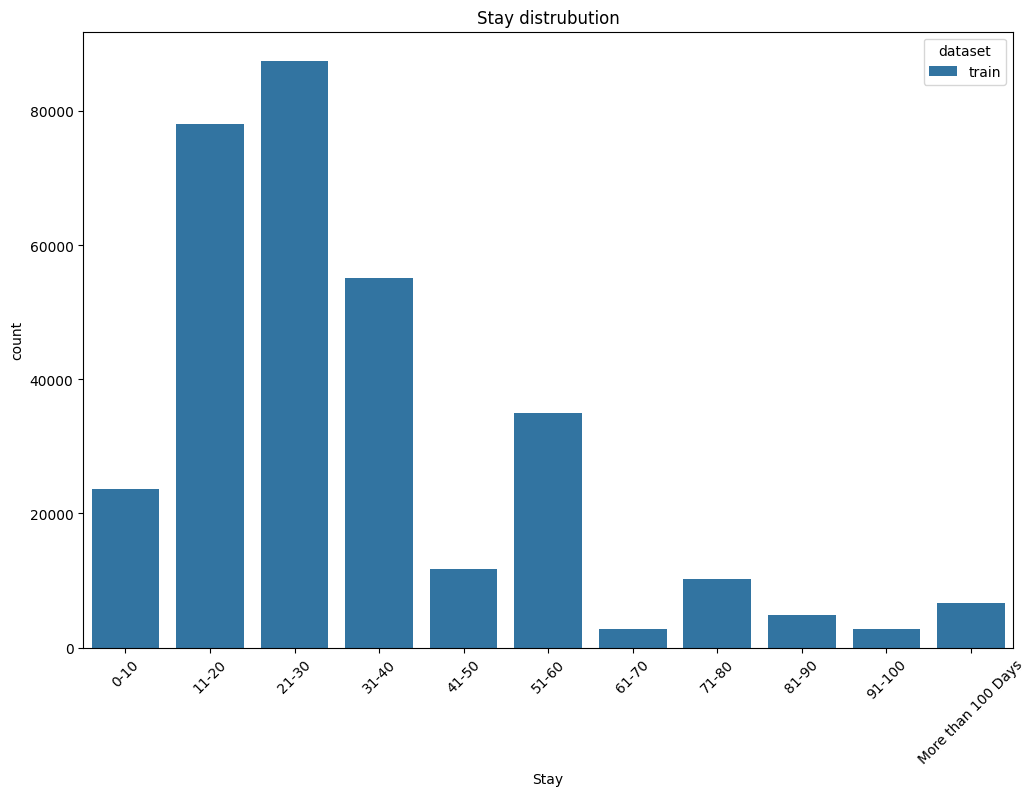

In [13]:
Stay_df = df.groupby(["Stay", "dataset"])["patientid"].count().reset_index()
Stay_df.columns = ["Stay", "dataset", "count"]
plt.figure(figsize=(12, 8))
sns.barplot(data=Stay_df, x="Stay", y="count", hue="dataset")
plt.title("Stay distrubution")
plt.xticks(rotation=45)
plt.show()


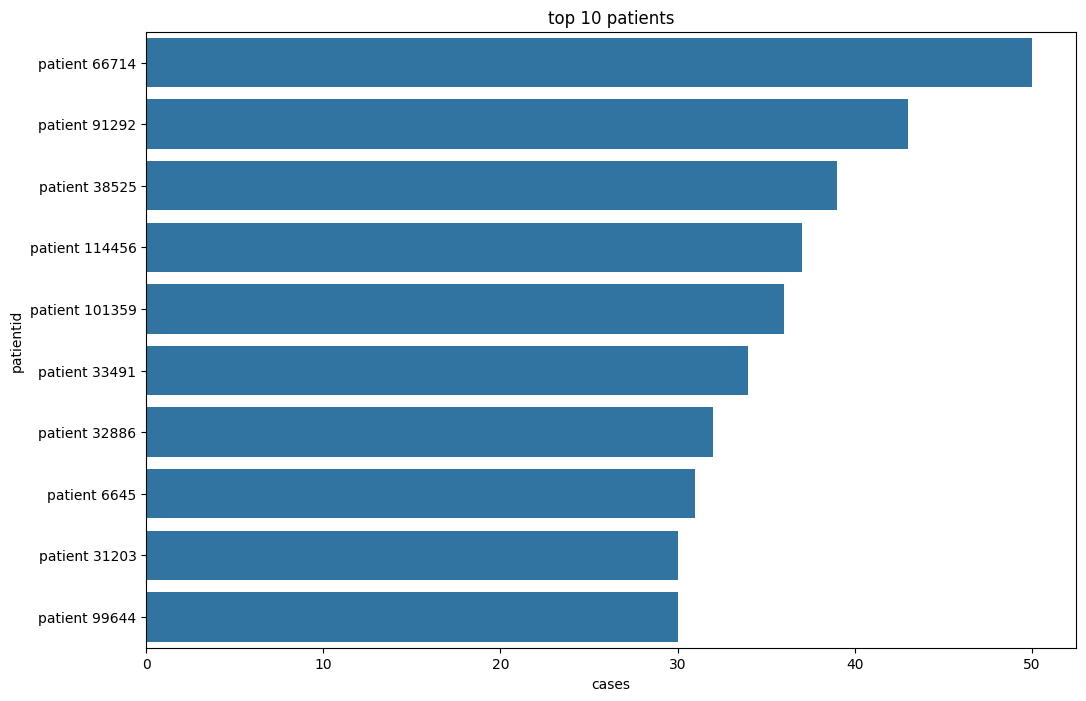

In [14]:
data=df["patientid"].value_counts().reset_index()
data.columns=["patientid","cases"]
data["patientid"]="patient "+data["patientid"].astype(str)
data.sort_values("cases",ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=data.head(10), x="cases", y="patientid",orient="h")
plt.title("top 10 patients")
plt.show()


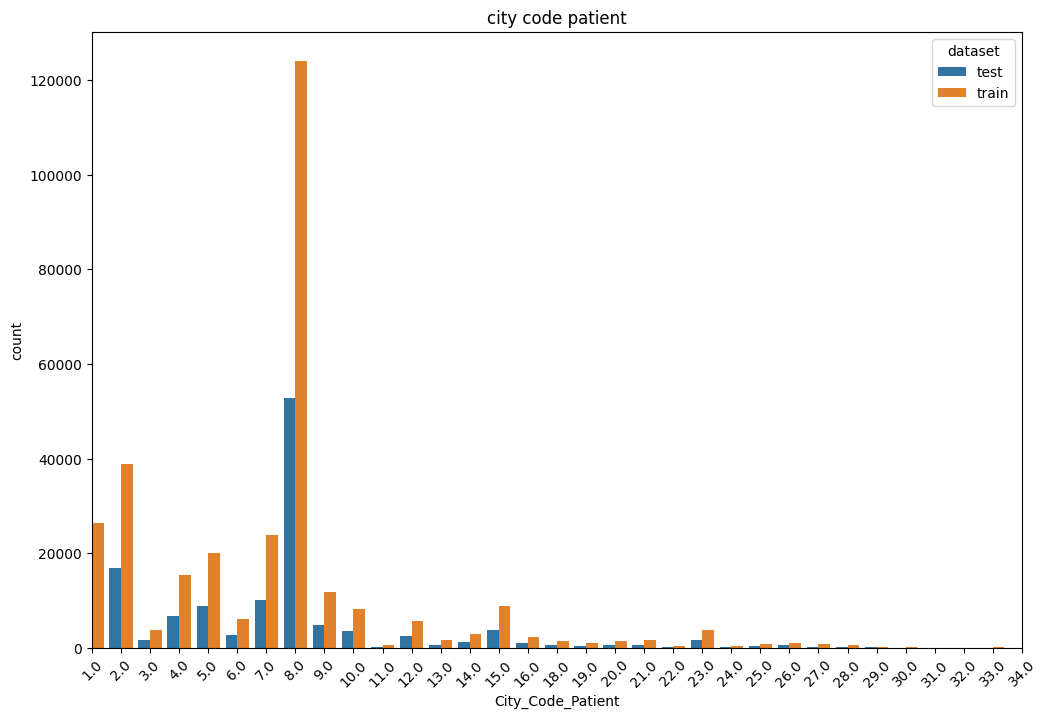

In [15]:
city_code_df = df.groupby(["City_Code_Patient", "dataset"])["patientid"].count().reset_index()
city_code_df.columns = ["City_Code_Patient", "dataset", "count"]
plt.figure(figsize=(12, 8))
sns.barplot(data=city_code_df, x="City_Code_Patient", y="count", hue="dataset")
plt.title("city code patient")
plt.xticks(rotation=45)
plt.xlim([0,32.0])
plt.show()


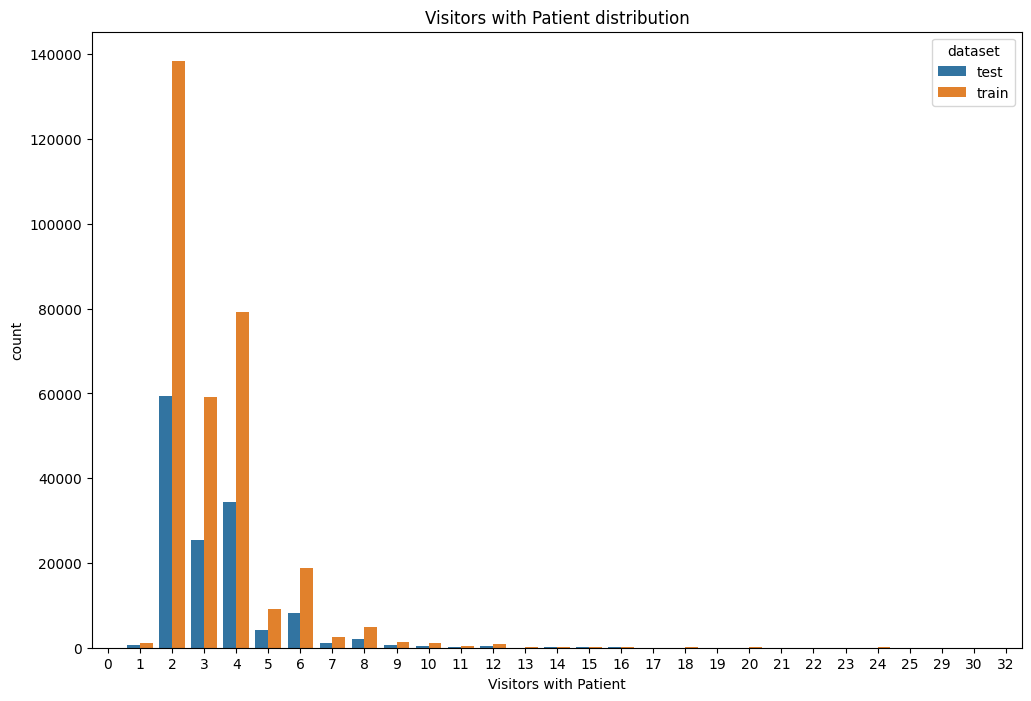

In [16]:
visitors_df = df.groupby(["Visitors with Patient", "dataset"])["patientid"].count().reset_index()
visitors_df.columns = ["Visitors with Patient", "dataset", "count"]
plt.figure(figsize=(12, 8))
sns.barplot(data=visitors_df, x="Visitors with Patient", y="count", hue="dataset")
plt.title("Visitors with Patient distribution")
plt.show()


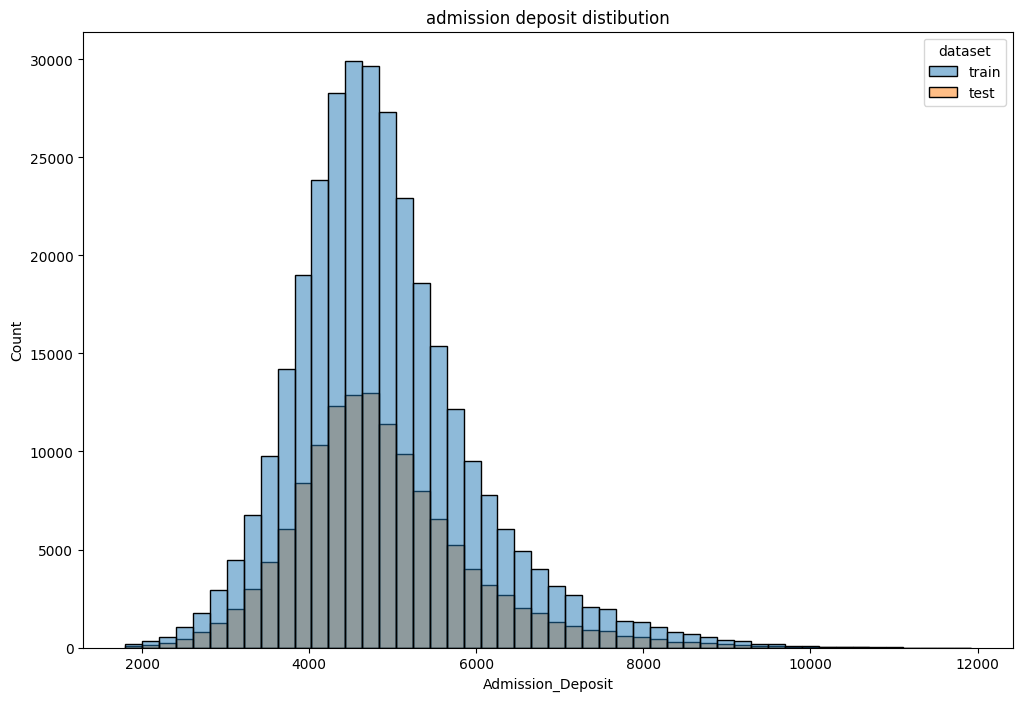

In [17]:

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="Admission_Deposit", hue="dataset",bins=50) 
plt.title("admission deposit distibution")

plt.show()


In [18]:
df["Admission_Deposit"].mean()

4877.434022327358

In [19]:
df.isna().sum()

Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dataset                                   0
dtype: int64

In [37]:
res=df.columns[df.isna().sum()>200]
type(res)

pandas.core.indexes.base.Index

In [35]:
threshold=len(df)* 0.05
threshold

22774.75

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455495 entries, 0 to 137056
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      455495 non-null  int64  
 1   Hospital_type_code                 455495 non-null  object 
 2   City_Code_Hospital                 455495 non-null  int64  
 3   Hospital_region_code               455495 non-null  object 
 4   Available Extra Rooms in Hospital  455495 non-null  int64  
 5   Department                         455495 non-null  object 
 6   Ward_Type                          455495 non-null  object 
 7   Ward_Facility_Code                 455495 non-null  object 
 8   Bed Grade                          455347 non-null  float64
 9   patientid                          455495 non-null  int64  
 10  City_Code_Patient                  448806 non-null  float64
 11  Type of Admission                  455495 no

In [34]:
print(df["Bed Grade"].mode()[0])

2.0


In [48]:
df.select_dtypes("object").tail()

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay,dataset
137052,b,Y,anesthesia,Q,D,Emergency,Minor,41-50,NaN,test
137053,e,X,radiotherapy,R,E,Emergency,Moderate,0-10,NaN,test
137054,c,Z,anesthesia,R,A,Urgent,Minor,0-10,NaN,test
137055,a,X,anesthesia,R,E,Trauma,Minor,41-50,NaN,test
137056,a,X,gynecology,Q,F,Trauma,Extreme,51-60,NaN,test


In [55]:
df["Ward_Type"].unique()

array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object)

In [58]:
df[df["Ward_Type"].str.contains("S|R|Q")]

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test
137053,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,test
137054,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,test
137055,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,test
